# DATA_TITANIC

https://www.kaggle.com/competitions/titanic/data

In [1]:
#pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importamos los algoritmos a emplear:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import accuracy_score

Importamos el dataset train.csv

In [5]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Borramos la columna de PassengerId
df = df.drop("PassengerId", axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis (EDA)

In [7]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
len(df)

891

In [9]:
df.shape

(891, 11)

In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Conclusiones:
Existen columnas de "missing values" (Valores que faltan)

In [11]:
# y aqui vemos cuantas columnas tiene valores que faltan
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [13]:
for cabina in df.Cabin:
    print(cabina)

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [15]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

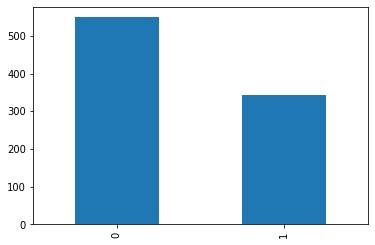

In [16]:
df.Survived.value_counts().plot(kind="bar")
plt.show()

# ¿Cómo seleccionar información concreta de nuestro dataset?

#FORMA 1

In [17]:
df["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

#FORMA 2

In [18]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [19]:
#FORMA 3

In [20]:
df[["Age"]].head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


# Crosstab

# pd.crosstab(df.Sex, df.Survived)

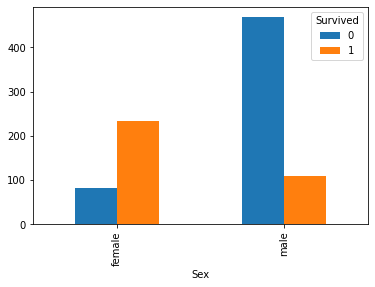

In [21]:
pd.crosstab(df.Sex, df.Survived).plot(kind="bar")
plt.show()

Conclusión:
La mayoría de las mujeres sobreviven.
La mayoría de los hombres NO sobrevivieron

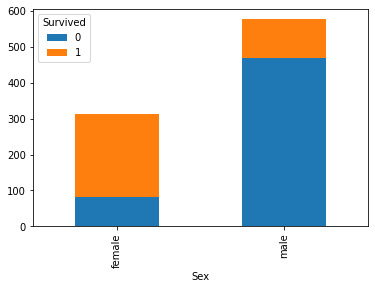

In [22]:
pd.crosstab(df.Sex, df.Survived).plot(kind="bar", stacked=True)
plt.show()

Conclusión:
Hay más hombres que mujeres, es casi el doble.

In [23]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


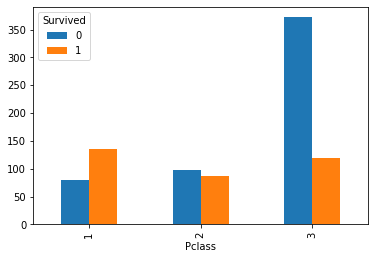

In [24]:
pd.crosstab(df.Pclass, df.Survived).plot(kind="bar")
plt.show()

Conclusión:
La mayoría de los que NO sobrevivieron eran de la 3ª clase

In [25]:
#GROUPBY

In [26]:
df.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

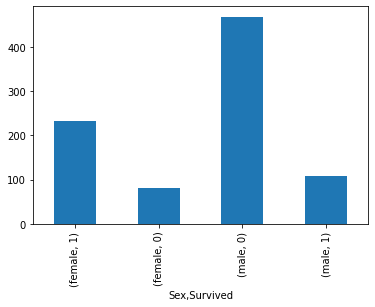

In [27]:
df.groupby("Sex").Survived.value_counts().plot(kind="bar")
plt.show()

# por filtrado
Selecciono aquellas filas donde Pclass == 1
Me creo un dataframe de la misma forma que tenía antes

##FORMA 1

In [28]:
df_sex_uno = df[df.Pclass == 1]
df_sex_uno.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [29]:
#OTRA FORMA
df_sex_crosstab = df[df.Pclass == 1]["Survived"]
df_sex_crosstab.head()

1     1
3     1
6     0
11    1
23    1
Name: Survived, dtype: int64

# Ejemplos de creación de dataframes

In [30]:
df_sobreviven_todos = df[df["Survived"] == 1]
df_sobreviven_ninguno = df[df["Survived"] == 0]
hombres_sobrevivieron = df[(df["Survived"] == 1) & (df["Sex"] == "male")]
hombres__no_sobrevivieron = df[(df["Survived"] == 0) & (df["Sex"] == "male")]
mujeres_sobrevivieron = df[(df["Survived"] == 1) & (df["Sex"] == "female")]
mujeres_no_sobrevivieron = df[(df["Survived"] == 0) & (df["Sex"] == "female")]

In [31]:
df_sobreviven_todos.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [32]:
df_sobreviven_todos.Survived.value_counts(3)

1    1.0
Name: Survived, dtype: float64

In [33]:
df_sobreviven_ninguno.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [34]:
hombres_sobrevivieron.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


In [35]:
hombres__no_sobrevivieron.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [36]:
mujeres_sobrevivieron.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [37]:
mujeres_no_sobrevivieron.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
38,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
40,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S


# Obtenemos información de los gráficos

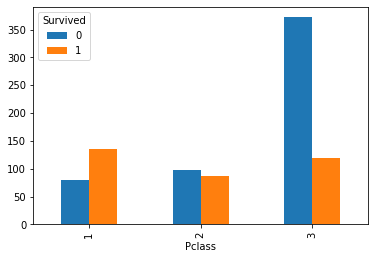

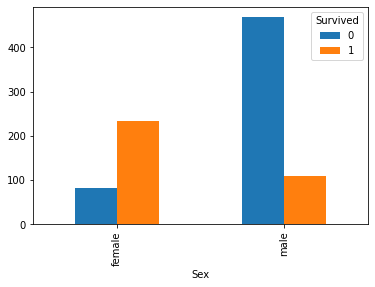

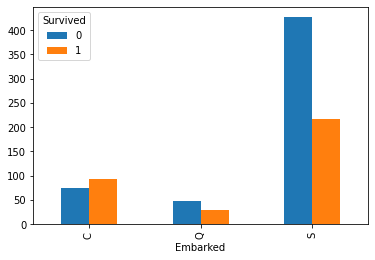

In [38]:
opciones = ["Pclass", "Sex", "Embarked"]
for opcion in opciones:
    pd.crosstab(df[opcion], df.Survived).plot(kind="bar")
    plt.show()

# SEABORN

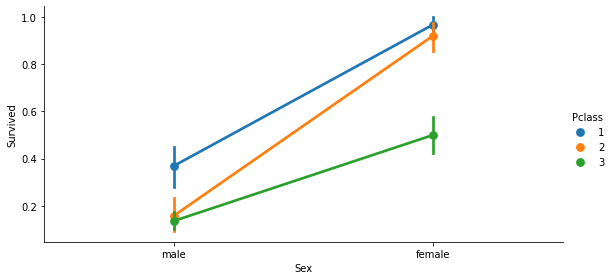

In [39]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", height=4, aspect=2, data=df)
plt.show()

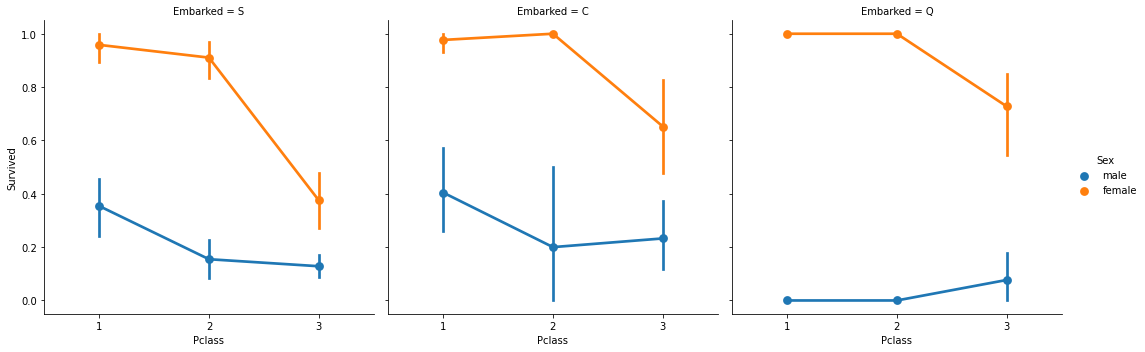

In [40]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="point", col="Embarked", data=df)
plt.show()

# Algunas conclusiones:
Nos fijamos en la gráfica de la izquierda, embarked="S" --> las mujeres de 3 clase que embarcaron en "S" fallecieron muchas en
comparación con 1 y 2 clase, pese a ello sobrevivieron algo más que los hombres de 1 clase del mismo puerto.
los hombres con mayor porcentaje e supervivencia embarcaron en "C"
Los hombres con menor porcentaje de supervivencia embarcaron en "Q"
Vemos nuevamente como la mayoría de las mujeres sobreviveron, pero no los hombres.

# Edad y supervivencia

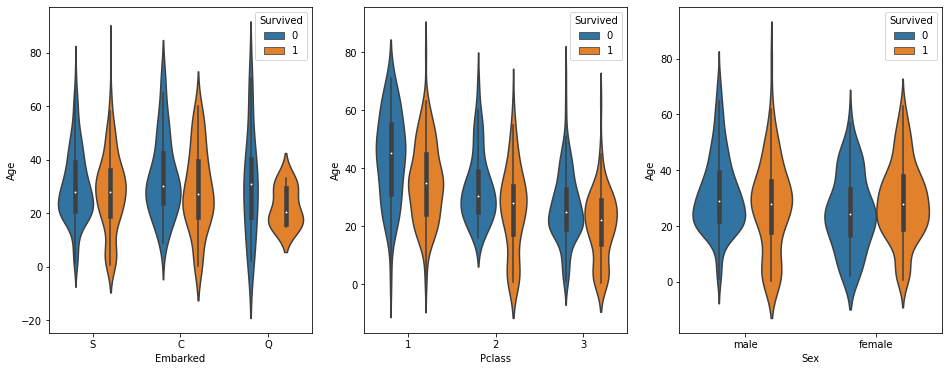

In [41]:
# me creo una figura
fig = plt.figure(figsize=(16,6))
# 3 subplots
# 1 fila 3 columnas - gráfica 1
ax1 = fig.add_subplot(131)
# 1 fila 3 columnas - gráfica 2
ax2 = fig.add_subplot(132)
# 1 fila 3 columnas - gráfica 3
ax3 = fig.add_subplot(133)
# violinplot
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, ax=ax3)
plt.show()

Hago un split== True, para mostrarlo más visual

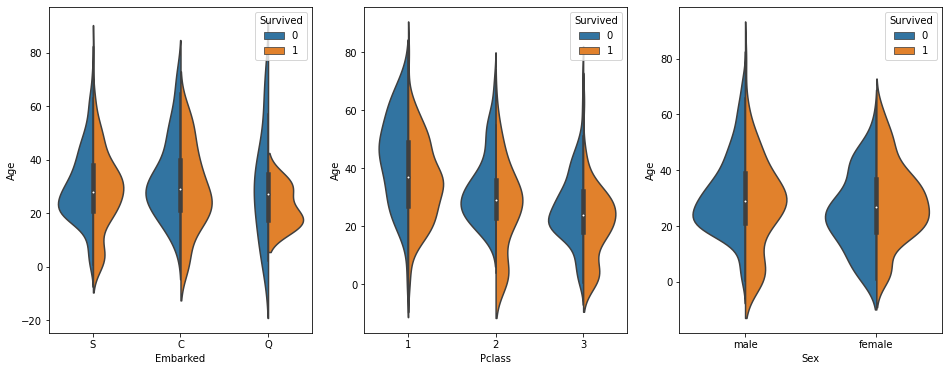

In [42]:
# me creo una figura
fig = plt.figure(figsize=(16,6))
# 3 subplots
# 1 fila 3 columnas - gráfica 1
ax1 = fig.add_subplot(131)
# 1 fila 3 columnas - gráfica 2
ax2 = fig.add_subplot(132)
# 1 fila 3 columnas - gráfica 3
ax3 = fig.add_subplot(133)
# violinplot
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, ax=ax3)
plt.show()

# Conclusiones:
EMBARKED y Age:
La gente de unos 18-35 años de Q SI sobrevivieron mayoritariamente,(no todos)
no hay porcentajes mayoritarios significativos en las otras 2 embarcaciones
En Q embarcaron bastantes niños los cuales no sobrevivieron.
PCLASS y Age:
De la 2ª clase sobre todo y la 3 sobrevivieron la mayoria de sus niños
Sex y Age:
Hay mas ancianos que ancianas
Los jovenes (varón) menores de 20 años en general sobrevivieron pero no las mujeres

In [43]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/var/folders/jw/lg6ll5ln5sx8l3dbpj7412480000gn/T/ipykernel_5397/309428283.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


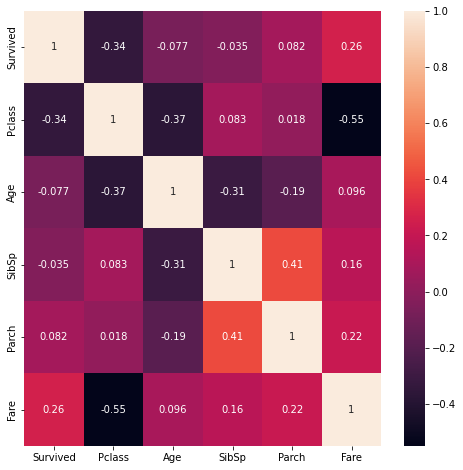

In [44]:
#HEAPMAP
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

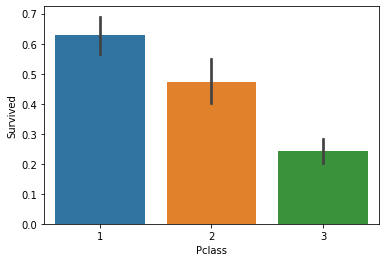

In [45]:
#BARPLOT
sns.barplot(x="Pclass", y="Survived", data=df)
plt.show()

In [46]:
def funcion_graficas(feat):
    plt.subplot(2, 1, 1)
    df.groupby(feat).Survived.value_counts().plot(kind="bar")
    plt.figure(figsize=(12,8))
    plt.subplot(2, 1, 2)
    sns.barplot(x=feat, y="Survived", data=df)
    plt.show()

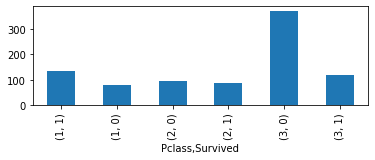

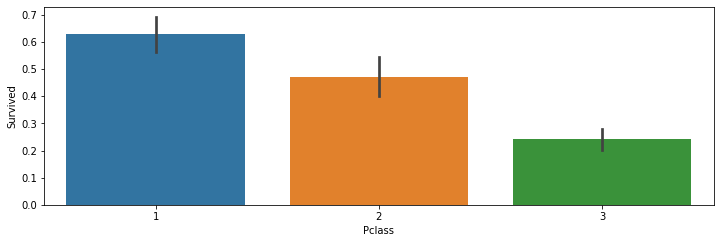

In [47]:
funcion_graficas("Pclass")

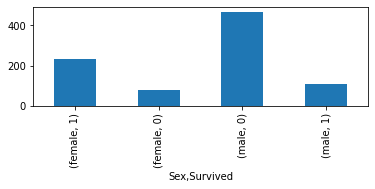

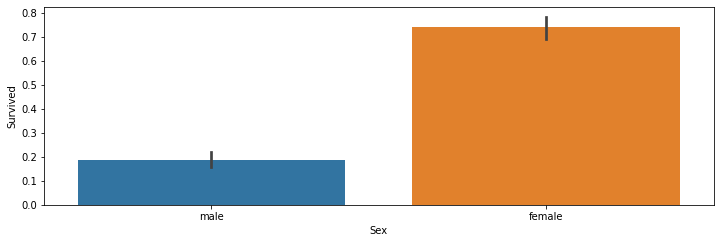

In [48]:
funcion_graficas("Sex")

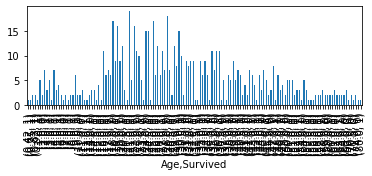

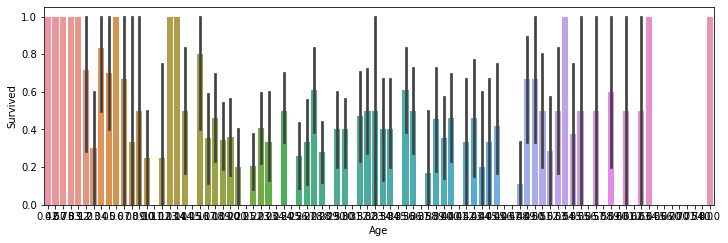

In [49]:
funcion_graficas("Age")

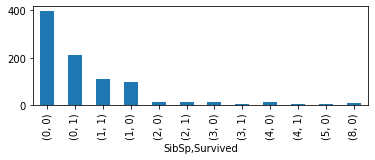

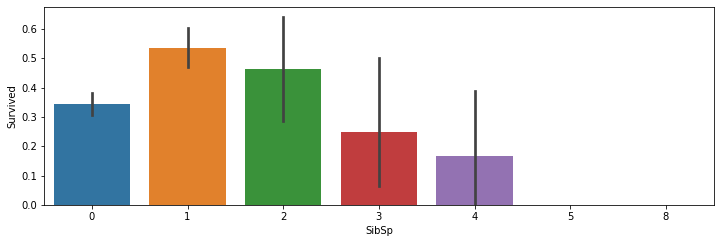

In [50]:
funcion_graficas("SibSp")

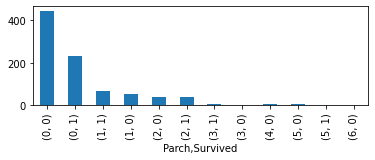

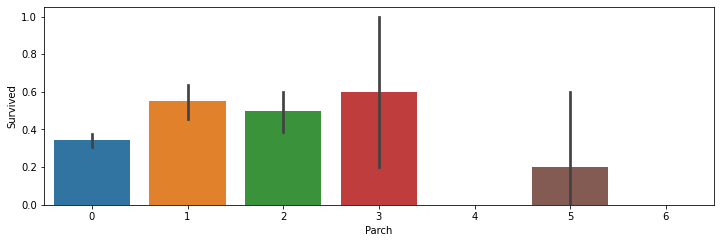

In [51]:
funcion_graficas("Parch")

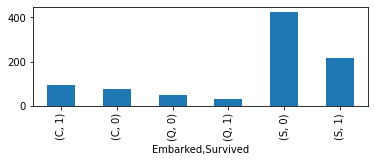

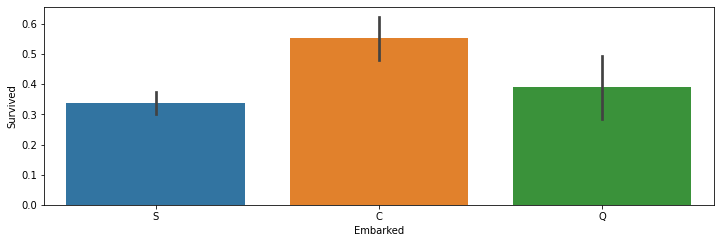

In [52]:
funcion_graficas("Embarked")

# Feature Engineering
En esta parte podemos hacer uso de la información obtenida y conclusiones.
Para hacerlo lo más simple posible, lo que haremos será elegir solamente algunas columnas.

In [53]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# -1-Name- no lo tendremos en cuenta por simplificar
df["Name"] = df["Name"].str.extract("([A-Za-z]+)", expand=False)
seria posible una posible forma de analizar la columna Name, pero no lo haremos.
-2-Age- Usamos el valor promedio de la columna para rellernar los valores que faltan

In [55]:
df.Age.isnull().sum()

177

In [56]:
df.Age = df.Age.fillna(df.Age.mean())

In [57]:
df.Age.isnull().sum()

0

In [58]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


-3-Ticket- No la tendremos en cuenta por simplificar

In [59]:
df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

-4-Cabin- No la tendremos en cuenta por falta de información

In [60]:
df.Cabin.isnull().sum(), len(df)

(687, 891)

-5-Embarked

In [61]:
df.Embarked.isnull().sum()

2

In [62]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [63]:
df["Embarked"] = df["Embarked"].fillna("S")

BORRAMOS del dataframe las columnas antes mencionadas

In [64]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Concepto de datos categóricos:
columnas con strings hombre/mujer por ejemplo.
columnas con strings con 3 opciones ("Embarked")
en el caso de Pclass 3 hace referencia a "tercera clase"
y 3 no vale, más que 1, y más en este caso, cuya probabilidad de supervivencia es más baja.

In [65]:
# pd.get_dummies()
df = pd.get_dummies(df, columns=["Sex", "Pclass", "Embarked"], drop_first=True)
df.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1


# Escalado de los datos
Existen varias formas de hacer el escalado de datos. Normalmente no hay diferencias significativas, pero algunas veces sí.
Por abreviar, trataremos de mencionar 2 tipos (sklearn):
StandardScaler
MinMaxScaler
En nuestro caso, no daremos importancia a cuál es el mejor en este caso concreto. (Preporcesamiento)

In [66]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [67]:
# StandardScaler
# x-mean(x) / std(x)
df.Age = (df.Age - np.mean(df.Age, axis=0)) / (np.std(df.Age, axis=0))
df.Fare = (df.Fare - np.mean(df.Fare, axis=0)) / (np.std(df.Fare, axis=0))
df.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",-0.592481,1,0,A/5 21171,-0.502445,NaN,1,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638789,1,0,PC 17599,0.786845,C85,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",-0.284663,0,0,STON/O2. 3101282,-0.488854,NaN,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407926,1,0,113803,0.420730,C123,0,0,0,0,1
4,0,"Allen, Mr. William Henry",0.407926,0,0,373450,-0.486337,NaN,1,0,1,0,1


# Obtención de X, y

In [68]:
X = df.drop("Survived", axis=1)
X.head()

,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,"Braund, Mr. Owen Harris",-0.592481,1,0,A/5 21171,-0.502445,NaN,1,0,1,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638789,1,0,PC 17599,0.786845,C85,0,0,0,0,0
2,"Heikkinen, Miss. Laina",-0.284663,0,0,STON/O2. 3101282,-0.488854,NaN,0,0,1,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407926,1,0,113803,0.420730,C123,0,0,0,0,1
4,"Allen, Mr. William Henry",0.407926,0,0,373450,-0.486337,NaN,1,0,1,0,1


In [69]:
y = df["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Entrenamiento y prueba

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train.head()

,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
331,"Partner, Mr. Austen",1.215947,0,0,113043,-0.074583,C124,1,0,0,0,1
733,"Berriman, Mr. William John",-0.515526,0,0,28425,-0.386671,NaN,1,1,0,0,1
382,"Tikkanen, Mr. Juho",0.177063,0,0,STON/O 2. 3101293,-0.488854,NaN,1,0,1,0,1
704,"Hansen, Mr. Henrik Juul",-0.284663,1,0,350025,-0.490280,NaN,1,0,1,0,1
813,"Andersson, Miss. Ebba Iris Alfrida",-1.823750,4,2,347082,-0.018709,NaN,0,0,1,0,1


In [72]:
X_test.head()

,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
709,"Moubarek, Master. Halim Gonios (""William George"")",0.000000,1,1,2661,-0.341452,NaN,1,0,1,0,0
439,"Kvillner, Mr. Johan Henrik Johannesson",0.100109,0,0,C.A. 18723,-0.437007,NaN,1,1,0,0,1
840,"Alhomaki, Mr. Ilmari Rudolf",-0.746389,0,0,SOTON/O2 3101287,-0.488854,NaN,1,0,1,0,1
720,"Harper, Miss. Annie Jessie ""Nina""",-1.823750,0,1,248727,0.016023,NaN,0,1,0,0,1
39,"Nicola-Yarred, Miss. Jamila",-1.208115,1,0,2651,-0.422074,NaN,0,0,1,0,0


In [73]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [74]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

Pruebo los posibles algoritmos a ensayar

In [75]:
# KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_KN = accuracy_score(y_test, y_pred)
acc_KN

ValueError: could not convert string to float: 'Partner, Mr. Austen'

In [ ]:
# DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred)
acc_DT

In [ ]:
# RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred)
acc_RF

In [ ]:
# GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_NB = accuracy_score(y_test, y_pred)
acc_NB

In [ ]:
# SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_SVC = accuracy_score(y_test, y_pred)
acc_SVC

Busco el que a priori mejor predice

In [ ]:
# RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred)
acc_RF

# Utilizo ese entrenamiento para el test.csv
Para evitar complejidad, y una posible explicación sobre persistencia del modelo,
https://scikit-learn.org/stable/modules/model_persistence.html
lo que haremos será hacer esos mismos cambios en test.csv

In [ ]:
test = pd.read_csv("test.csv")
test.head()

In [ ]:
df_train = pd.read_csv("train.csv")
df_train.head()

# Observación:
Vemos que nos falta la columna de supervivencia "Survived"
Pasos:
1. Haremos a cada columna exactamente los mismos cambios en test que en df.
2. Haremos la predicción (ahora no sabemos de momento como de buena o mala fue)
3. Nos iremos a Kaggle para enviar los resultados

In [ ]:
test.describe()

In [ ]:
test.isnull().sum()

In [ ]:
test.Age = test.Age.fillna(test.Age.mean())
test.Fare = test.Fare.fillna(test.Fare.mean())

In [ ]:
test.isnull().sum()

In [ ]:
test = test.drop(["Name", "Ticket", "Cabin"], axis=1)
test.head()

In [ ]:
test = pd.get_dummies(test, columns=["Sex", "Pclass", "Embarked"], drop_first=True)
test.head()

In [ ]:
test.Age = (test.Age - np.mean(test.Age, axis=0)) / (np.std(test.Age, axis=0))
test.Fare = (test.Fare - np.mean(test.Fare, axis=0)) / (np.std(test.Fare, axis=0))
test.head()

In [ ]:
test = test.drop("PassengerId", axis=1)
test.head()

In [ ]:
y_pred = clf.predict(test)
y_pred

In [ ]:
df_submision = pd.read_csv("./data/gender_submission.csv")
df_submision

Ahora sustituyo la información de la columna "Survived" por la de mi predicción

In [ ]:
df_submision["Survived"] = y_pred
df_submision.head()

# Paso a .csv

In [ ]:
df_submision.to_csv("./data/gender_submission_Final.csv", index=False)